# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">POLYCYSTIC OVARY SYNDROME (PCOS): DIAGNOSIS</p>

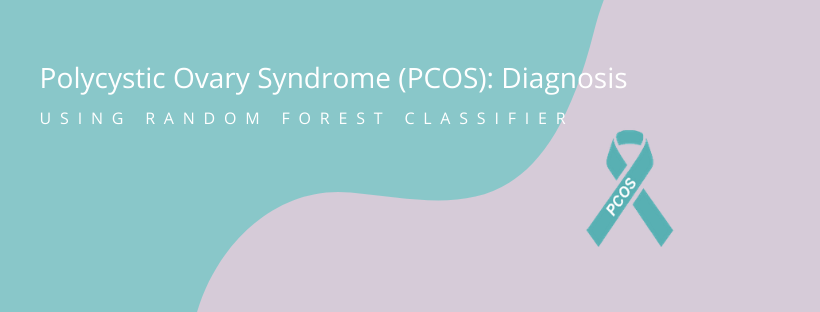

**<span style="color:teal;"> Polycystic Ovary Syndrome (PCOS) </span>** Polycystic Ovary Syndrome (PCOS) is a health problem that affects women of childbearing age. Women with PCOS have a hormonal imbalance and metabolism problems that may affect their overall health.

PCOS manifests as a variety of symptoms 

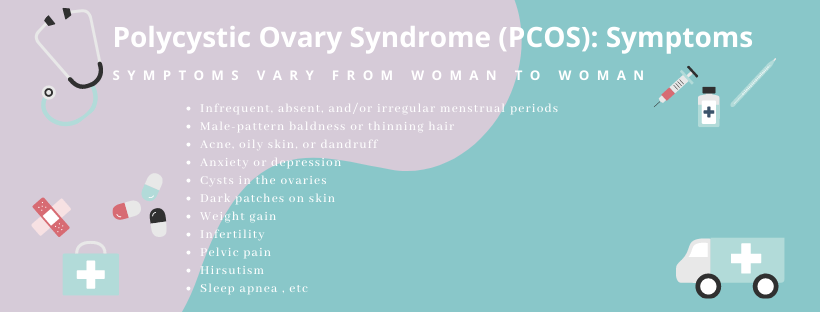

For more information on PCOS visit ([here](https://www.webmd.com/women/what-is-pcos))

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:teal;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>

* **Importing Library**
* **Loading data**
* **Data Preprocessing**
* **Data Visualization**
* **Model Building**
  

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>


In [ ]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>
 
 **About the data:**

* This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters. 

* This data is collected from 10 different hospitals across Kerala, India.

* The unit used is feet to cm

* Blood pressure entered as systolic and diastolic separately

* RBS means Random glucose test

* Beta-HCG cases are mentioned as Case I and II

* Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18


In [ ]:
#Loding data into the kernels 

file_path_with_infertility="../input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv"
file_path_without_infertility="../input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Preprocessing</p>

**Steps involved in Data Preprocessing:**

* Merging the two files that are sorted into two based on patients with infertility and without infertility

* Dropping the repeated features
 
* Encoding categorical variables (dtype objects)

* Dealing with missing values 


**<span style="color:teal;"> Merging the two files as per patient file no. and dropping the repeated features</span>**

In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head() 

Everything looks alright we can work with this.

We have a dataset of shape 5 rows × 44 columns.

Let's head up to the next step and have a further look at the data.

In [ ]:
data.info()

**<span style="color:teal;"> Encoding categorical variables (dtype objects)</span>**

In [ ]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)"].head() 

In [ ]:
#Similarly

data["II    beta-HCG(mIU/mL)"].head()

After having a look at this info we may conclude that:

* Some numeric data are saved as strings.
* There are some missing values. Namely, Marriage Status (Yrs)& Fast food (Y/N)

In [ ]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>


**Steps involved in EDA**
* Feature selection based on the correlation factor 
* Patterns Of Length Of The Menstrual Cycle
* Patterns Of BMI 
* Patterns Of Irregularity In Mensuration 
* Number of Follicles
* Some Miscellaneous EDA


**<span style="color:teal;"> Let's explore features </span>**

In [ ]:
# Having a look at some basic statistical details.

data.describe()

In [ ]:
#Added in the recent update. 
#This came upon evaluating the dataset some obvious outliers I am not explaining the process I used. 
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

In [ ]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [ ]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

In [ ]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 **<span style="color:teal;"> Patterns Of Length Of The Menstrual Cycle </span>**

In [ ]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age. 

 **<span style="color:teal;"> Patterns Of BMI </span>**

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

 **<span style="color:teal;"> Patterns Of Irregularity In Mensuration  </span>**

*There is no clarity on what this feature and its values indicate but, *

**Apparently in the feature "Cycle(R/I)" value:**

**4** indicates irregular menstrual cycle 

**2** indicates a regular menstrual cycle

In [ ]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

 **<span style="color:teal;"> Number Of Follicles </span>**

In [ ]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. 
Thia is curious let's exlore it with boxen plot. 

In [ ]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well. 
 
**<span style="color:teal;"> Some Miscellaneous EDA </span>**

In [ ]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Model Building</p>

**Steps involved in Model Building:**

* Assigning values to features as X and target as y
* Split test and training sets
* Fitting a vanilla model as the base Random Forest model
* Hyperparameter tuning using GridSearch CV
* Fitting the final model 
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

 **<span style="color:teal;"> Fitting the Model </span>**
 
Fitting a rather vanilla modle as base model 

In [ ]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

In [ ]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = { 
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 7)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

In [ ]:
#Fitting the model with selected parameters

rfc1=RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)

#Testing the Model on test set

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

**<span style="color:teal;"> Classification Report & Confusion Matrix </span>**

In [ ]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

In [ ]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

**<span style="color:teal;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:teal;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:teal;">Best Wishes!</span>**

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">END</p>